In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import re

In [3]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../Scripts'))
sys.path.append(scripts_path)

In [ ]:
from path import PATH_PARK_CSV, PATH_PARK_XLSX

## 1 - Import Data

In [5]:
data = pd.read_csv(PATH_PARK_CSV)

In [6]:
data2 = data.copy()

In [7]:
data2.head()

,Car,Quote,Ranking,NewPrice,Pros+,Cons-,link
0,GWM ORA 03 Hatchback (2025 onwards) Review,"Interesting alternative to mainstream EVs, now...",2.7 out of 5,"£24,940 - £32,940","Well specified for the money\r\nPlush, airy in...",Tiny boot\r\nPoor infotainment\r\nZero brand r...,1
1,Renault 5 E-Tech Hatchback (2025 onwards) Review,Affordable style and substance,4.5 out of 5,"£22,995 - £28,995","Classy interior\r\nTidy handling\r\nFrom £23,000","Real-world range around 175 miles, 140 in wint...",1
2,Suzuki Swift Hatchback (2024 onwards) Review,More polished Swift a hoot to drive,3.9 out of 5,"£19,209 - £21,559",Good fun to drive\r\nSlick gearbox\r\nStill fa...,Rivals have plusher interiors...\r\n...and bet...,1
3,MINI Cooper Hatchback (2024 onwards) Review,"The definitive city car, refined",4.1 out of 5,"£23,270 - £36,570",Great fun to drive\r\nCool styling\r\nUpmarket...,No manual option\r\nLimited boot space\r\nCram...,1
4,MINI Cooper Electric Hatchback (2024 onwards) ...,Much improved second-gen electric MINI,4.1 out of 5,"£39,120 - £42,920",Sharp handling and strong performance\r\nFanta...,Interior plastics could be better\r\nThree-doo...,1


## 2 - EDA

#### 2 - 1 Nan Values

In [8]:
data2.isna().sum()

Car         0
Quote       0
Ranking     0
NewPrice    0
Pros+       0
Cons-       0
link        0
dtype: int64

<Axes: >

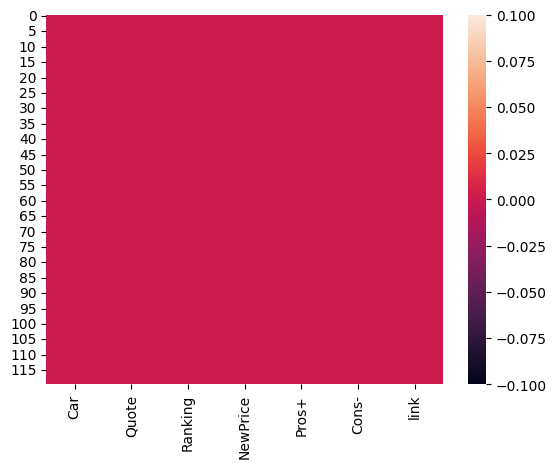

In [9]:
sns.heatmap(data2.isna())

#### 2 - 2 data-info

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car       120 non-null    object
 1   Quote     120 non-null    object
 2   Ranking   120 non-null    object
 3   NewPrice  120 non-null    object
 4   Pros+     120 non-null    object
 5   Cons-     120 non-null    object
 6   link      120 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 6.7+ KB


#### 2 - 3 Data Cleaning

##### 2 - 3.1 FullCareName

In [11]:
def extractName(text):
    words=text.split()
    return ' '.join(words[:-1])

In [12]:
data2['CarType'] = data2['Car'].apply(extractName)

In [13]:
data2.head()

,Car,Quote,Ranking,NewPrice,Pros+,Cons-,link,CarType
0,GWM ORA 03 Hatchback (2025 onwards) Review,"Interesting alternative to mainstream EVs, now...",2.7 out of 5,"£24,940 - £32,940","Well specified for the money\r\nPlush, airy in...",Tiny boot\r\nPoor infotainment\r\nZero brand r...,1,GWM ORA 03 Hatchback (2025 onwards)
1,Renault 5 E-Tech Hatchback (2025 onwards) Review,Affordable style and substance,4.5 out of 5,"£22,995 - £28,995","Classy interior\r\nTidy handling\r\nFrom £23,000","Real-world range around 175 miles, 140 in wint...",1,Renault 5 E-Tech Hatchback (2025 onwards)
2,Suzuki Swift Hatchback (2024 onwards) Review,More polished Swift a hoot to drive,3.9 out of 5,"£19,209 - £21,559",Good fun to drive\r\nSlick gearbox\r\nStill fa...,Rivals have plusher interiors...\r\n...and bet...,1,Suzuki Swift Hatchback (2024 onwards)
3,MINI Cooper Hatchback (2024 onwards) Review,"The definitive city car, refined",4.1 out of 5,"£23,270 - £36,570",Great fun to drive\r\nCool styling\r\nUpmarket...,No manual option\r\nLimited boot space\r\nCram...,1,MINI Cooper Hatchback (2024 onwards)
4,MINI Cooper Electric Hatchback (2024 onwards) ...,Much improved second-gen electric MINI,4.1 out of 5,"£39,120 - £42,920",Sharp handling and strong performance\r\nFanta...,Interior plastics could be better\r\nThree-doo...,1,MINI Cooper Electric Hatchback (2024 onwards)


##### 2 - 3.2 Ranking

In [14]:
def extractRank(text):
    words=text.split()
    return float(words[0])

In [15]:
data2['Rank'] = data2['Ranking'].apply(extractRank)

In [16]:
data2.head()

,Car,Quote,Ranking,NewPrice,Pros+,Cons-,link,CarType,Rank
0,GWM ORA 03 Hatchback (2025 onwards) Review,"Interesting alternative to mainstream EVs, now...",2.7 out of 5,"£24,940 - £32,940","Well specified for the money\r\nPlush, airy in...",Tiny boot\r\nPoor infotainment\r\nZero brand r...,1,GWM ORA 03 Hatchback (2025 onwards),2.7
1,Renault 5 E-Tech Hatchback (2025 onwards) Review,Affordable style and substance,4.5 out of 5,"£22,995 - £28,995","Classy interior\r\nTidy handling\r\nFrom £23,000","Real-world range around 175 miles, 140 in wint...",1,Renault 5 E-Tech Hatchback (2025 onwards),4.5
2,Suzuki Swift Hatchback (2024 onwards) Review,More polished Swift a hoot to drive,3.9 out of 5,"£19,209 - £21,559",Good fun to drive\r\nSlick gearbox\r\nStill fa...,Rivals have plusher interiors...\r\n...and bet...,1,Suzuki Swift Hatchback (2024 onwards),3.9
3,MINI Cooper Hatchback (2024 onwards) Review,"The definitive city car, refined",4.1 out of 5,"£23,270 - £36,570",Great fun to drive\r\nCool styling\r\nUpmarket...,No manual option\r\nLimited boot space\r\nCram...,1,MINI Cooper Hatchback (2024 onwards),4.1
4,MINI Cooper Electric Hatchback (2024 onwards) ...,Much improved second-gen electric MINI,4.1 out of 5,"£39,120 - £42,920",Sharp handling and strong performance\r\nFanta...,Interior plastics could be better\r\nThree-doo...,1,MINI Cooper Electric Hatchback (2024 onwards),4.1


##### 2 - 3.3 CarPrice

In [19]:
def extractColumnPrice(text):
    cleaned_text = re.sub(r'[^\w-]', '', text)
    words=cleaned_text.split('-')
    series=pd.Series(words)
    return series.astype(float)

In [20]:
data2[['Price1','Price2']] = data2['NewPrice'].apply(extractColumnPrice)

In [21]:
data2.head()

,Car,Quote,Ranking,NewPrice,Pros+,Cons-,link,CarType,Rank,Price1,Price2
0,GWM ORA 03 Hatchback (2025 onwards) Review,"Interesting alternative to mainstream EVs, now...",2.7 out of 5,"£24,940 - £32,940","Well specified for the money\r\nPlush, airy in...",Tiny boot\r\nPoor infotainment\r\nZero brand r...,1,GWM ORA 03 Hatchback (2025 onwards),2.7,24940.0,32940.0
1,Renault 5 E-Tech Hatchback (2025 onwards) Review,Affordable style and substance,4.5 out of 5,"£22,995 - £28,995","Classy interior\r\nTidy handling\r\nFrom £23,000","Real-world range around 175 miles, 140 in wint...",1,Renault 5 E-Tech Hatchback (2025 onwards),4.5,22995.0,28995.0
2,Suzuki Swift Hatchback (2024 onwards) Review,More polished Swift a hoot to drive,3.9 out of 5,"£19,209 - £21,559",Good fun to drive\r\nSlick gearbox\r\nStill fa...,Rivals have plusher interiors...\r\n...and bet...,1,Suzuki Swift Hatchback (2024 onwards),3.9,19209.0,21559.0
3,MINI Cooper Hatchback (2024 onwards) Review,"The definitive city car, refined",4.1 out of 5,"£23,270 - £36,570",Great fun to drive\r\nCool styling\r\nUpmarket...,No manual option\r\nLimited boot space\r\nCram...,1,MINI Cooper Hatchback (2024 onwards),4.1,23270.0,36570.0
4,MINI Cooper Electric Hatchback (2024 onwards) ...,Much improved second-gen electric MINI,4.1 out of 5,"£39,120 - £42,920",Sharp handling and strong performance\r\nFanta...,Interior plastics could be better\r\nThree-doo...,1,MINI Cooper Electric Hatchback (2024 onwards),4.1,39120.0,42920.0


##### 2 - 3.4 in one line

In [47]:
def addHash(text):
    content = text.replace("\r\n", '-')
    return content

In [51]:
data2['Pros++']=data2['Pros+'].apply(addHash)
data2['Cons--']=data2['Cons-'].apply(addHash)

In [52]:
data2.head()

,Quote,Pros+,Cons-,link,CarType,Rank,Price1,Price2,Pros++,Cons--
0,"Interesting alternative to mainstream EVs, now...","Well specified for the money\r\nPlush, airy in...",Tiny boot\r\nPoor infotainment\r\nZero brand r...,1,GWM ORA 03 Hatchback (2025 onwards),2.7,24940.0,32940.0,"Well specified for the money-Plush, airy inter...",Tiny boot-Poor infotainment-Zero brand recogni...
1,Affordable style and substance,"Classy interior\r\nTidy handling\r\nFrom £23,000","Real-world range around 175 miles, 140 in wint...",1,Renault 5 E-Tech Hatchback (2025 onwards),4.5,22995.0,28995.0,"Classy interior-Tidy handling-From £23,000","Real-world range around 175 miles, 140 in wint..."
2,More polished Swift a hoot to drive,Good fun to drive\r\nSlick gearbox\r\nStill fa...,Rivals have plusher interiors...\r\n...and bet...,1,Suzuki Swift Hatchback (2024 onwards),3.9,19209.0,21559.0,Good fun to drive-Slick gearbox-Still fairly c...,Rivals have plusher interiors...-...and better...
3,"The definitive city car, refined",Great fun to drive\r\nCool styling\r\nUpmarket...,No manual option\r\nLimited boot space\r\nCram...,1,MINI Cooper Hatchback (2024 onwards),4.1,23270.0,36570.0,Great fun to drive-Cool styling-Upmarket inter...,No manual option-Limited boot space-Cramped re...
4,Much improved second-gen electric MINI,Sharp handling and strong performance\r\nFanta...,Interior plastics could be better\r\nThree-doo...,1,MINI Cooper Electric Hatchback (2024 onwards),4.1,39120.0,42920.0,Sharp handling and strong performance-Fantasti...,Interior plastics could be better-Three-door b...


In [ ]:
## data2.drop(["NewPrice", "Ranking", "Car"], axis = 1, inplace=True)
## data2.drop(["Pros+","Cons-"], axis = 1, inplace=True)
data2.drop(["link"], axis = 1, inplace=True)

In [62]:
data2

,Quote,CarType,Rank,Price1,Price2,Pros++,Cons--
0,"Interesting alternative to mainstream EVs, now...",GWM ORA 03 Hatchback (2025 onwards),2.7,24940.0,32940.0,"Well specified for the money-Plush, airy inter...",Tiny boot-Poor infotainment-Zero brand recogni...
1,Affordable style and substance,Renault 5 E-Tech Hatchback (2025 onwards),4.5,22995.0,28995.0,"Classy interior-Tidy handling-From £23,000","Real-world range around 175 miles, 140 in wint..."
2,More polished Swift a hoot to drive,Suzuki Swift Hatchback (2024 onwards),3.9,19209.0,21559.0,Good fun to drive-Slick gearbox-Still fairly c...,Rivals have plusher interiors...-...and better...
3,"The definitive city car, refined",MINI Cooper Hatchback (2024 onwards),4.1,23270.0,36570.0,Great fun to drive-Cool styling-Upmarket inter...,No manual option-Limited boot space-Cramped re...
4,Much improved second-gen electric MINI,MINI Cooper Electric Hatchback (2024 onwards),4.1,39120.0,42920.0,Sharp handling and strong performance-Fantasti...,Interior plastics could be better-Three-door b...
...,...,...,...,...,...,...,...
115,Unparalleled value for an EV,LEAPMOTOR T03 Hatchback (2024 onwards),3.0,15995.0,15995.0,Fantastic value-Very well equipped for the pri...,"Very few options to customise-Only one, weak e..."
116,"Odd name, decent car.",BYD Dolphin Hatchback (2023 onwards),3.6,26195.0,31695.0,Terrific value and efficiency-Strong accelerat...,Boot not the largest-Could be more fun to driv...
117,"Serene open-topped experience, but you pay han...",MINI Electric Convertible Convertible (2023 - ...,2.0,24209.0,31413.0,It’s an electric convertible!-Serene driving e...,Costs the same as a Porsche Boxster-Maximum ra...
118,Abarth's first EV hot hatch is fun but comprom...,Abarth 500e Hatchback (2023 onwards),3.5,29975.0,34475.0,Exciting looks-Compact and agile-Premium interior,Not as fun as petrol models-Sound generator is...


In [63]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quote    120 non-null    object 
 1   CarType  120 non-null    object 
 2   Rank     120 non-null    float64
 3   Price1   120 non-null    float64
 4   Price2   120 non-null    float64
 5   Pros++   120 non-null    object 
 6   Cons--   120 non-null    object 
dtypes: float64(3), object(4)
memory usage: 6.7+ KB
